## Imports


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from collections import Counter

In [ ]:
# Importando os DFs
df_train = pd.read_csv("/content/drive/MyDrive/mundiale/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/mundiale/test.csv")

## Explorando os dados de treino

In [ ]:
# 10 primeiras linhas
df_train.head(10)

,id,keyword,location,text,target
0,1118,blew%20up,"Brooklyn, NY",@YahooSchwab easy way to look good after the R...,0
1,1558,bomb,NaN,@dopeitsval ahh you're bomb baby ??,0
2,4830,evacuation,NaN,Run out evacuation hospital indexing remedial ...,1
3,3674,destroy,Trackside California,Wow Crackdown 3 uses multiple servers in multi...,0
4,5368,fire%20truck,NaN,wild night in the village of pugwash every fir...,1
5,10253,war%20zone,Somewhere else...,This bed looks like a war zone.,0
6,8111,rescued,NaN,Funds Needed for Rescued then Abandoned Cocker...,0
7,1963,burning%20buildings,Spying on your thoughts,@kshllcenterpri1 @Progress4Ohio burning down b...,1
8,9329,survive,EveryWhere,:: Survive??,0
9,4589,emergency%20plan,NaN,Do you have an emergency drinking water plan? ...,0


In [ ]:
# Shape
df_train.shape

(7613, 5)

In [ ]:
# Info do df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
# Verifica se há valores nulos
df_train.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
# Dropando os valores nulos
df_train = df_train.dropna(subset=['location', 'keyword'])
df_train.shape

(5080, 5)

In [ ]:
# Normalizar texto (converter para minúsculas)
df_train['text'] = df_train['text'].str.lower()

<ipython-input-59-2e393ec73362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'] = df_train['text'].str.lower()


In [ ]:
# Dropando duplicatas
df_train = df_train.drop_duplicates()

In [ ]:
# Biblioteca para regex
import re

# Função para pré-processamento de texto
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remover caracteres repetidos (mais de 2)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Remover caracteres especiais, emails, e mencionados como @username
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'@[^\s]+', '', text)

    # Remover hashtags
    text = re.sub(r'#\S+', '', text)

    return text

# Aplicar a função de pré-processamento ao conjunto de dados
df_train['text'] = df_train['text'].apply(preprocess_text)

In [ ]:
# Conferindo se foi limpo
df_train['text']

,text
0,yahooschwab easy way to look good after the ra...
3,wow crackdown uses multiple servers in multip...
5,this bed looks like a war zone
7,kshllcenterpri progressohio burning down build...
8,survive
...,...
7606,omg nixon lives that is richard m nixon tricky...
7609,photographer brian ruebs endures feet climb to...
7610,reddit will now quarantine offensive content
7611,samelsamel has a crush


In [ ]:
# Conferindo a contagem de palavras
counter_keyword = Counter(df_train['keyword'])
counter_keyword_target_0 = Counter(df_train[df_train['target'] == 0]['keyword'])
counter_keyword_target_1 = Counter(df_train[df_train['target'] == 1]['keyword'])
print("Keywords mais recorrentes",counter_keyword)
print("Keywords mais recorrentes e com a classe target 0",counter_keyword_target_0)
print("Keywords mais recorrentes e com a classe target 1",counter_keyword_target_1)

Keywords mais recorrentes Counter({'collision': 36, 'whirlwind': 33, 'armageddon': 32, 'fatalities': 32, 'sandstorm': 31, 'derailed': 31, 'outbreak': 31, 'emergency%20plan': 31, 'flames': 31, 'danger': 30, 'upheaval': 30, 'harm': 30, 'damage': 30, 'earthquake': 30, 'desolation': 30, 'inundated': 30, 'ablaze': 29, 'deluge': 29, 'evacuation': 29, 'airplane%20accident': 29, 'sinkhole': 29, 'buildings%20on%20fire': 29, 'flood': 29, 'displaced': 29, 'flattened': 29, 'weapons': 29, 'collapse': 29, 'rainstorm': 29, 'burning%20buildings': 28, 'flooding': 28, 'fear': 28, 'weapon': 28, 'deaths': 28, 'ruin': 28, 'collided': 28, 'drought': 28, 'wreckage': 28, 'accident': 28, 'attacked': 28, 'bioterror': 28, 'siren': 28, 'bloody': 28, 'demolish': 28, 'arsonist': 28, 'detonate': 28, 'evacuated': 27, 'emergency%20services': 27, 'wounds': 27, 'oil%20spill': 27, 'loud%20bang': 27, 'mudslide': 27, 'wreck': 27, 'wounded': 27, 'injuries': 27, 'derail': 27, 'drowned': 26, 'screaming': 26, 'emergency': 26, 

In [ ]:
from nltk import bigrams
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

# Tokenizar os tweets em palavras
tokens = ' '.join(df_train['text']).split()

# Criar bigrams
bi_grams = list(bigrams(tokens))

# Calcular a frequência dos bigrams
bi_gram_freq = FreqDist(bi_grams)

# Exibir os 10 bigrams mais comuns
bi_gram_freq.most_common(60)

#

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(('in', 'the'), 219),
 (('of', 'the'), 169),
 (('to', 'be'), 85),
 (('on', 'the'), 84),
 (('to', 'the'), 79),
 (('in', 'a'), 73),
 (('for', 'the'), 68),
 (('at', 'the'), 63),
 (('like', 'a'), 60),
 (('and', 'the'), 57),
 (('i', 'just'), 50),
 (('is', 'a'), 49),
 (('is', 'the'), 47),
 (('by', 'a'), 46),
 (('by', 'the'), 46),
 (('i', 'was'), 44),
 (('for', 'a'), 43),
 (('it', 'was'), 42),
 (('going', 'to'), 41),
 (('of', 'a'), 40),
 (('with', 'a'), 40),
 (('will', 'be'), 39),
 (('i', 'have'), 38),
 (('to', 'get'), 38),
 (('have', 'been'), 37),
 (('if', 'you'), 37),
 (('burning', 'buildings'), 36),
 (('this', 'is'), 36),
 (('a', 'youtube'), 36),
 (('have', 'to'), 36),
 (('have', 'a'), 34),
 (('to', 'a'), 34),
 (('be', 'a'), 33),
 (('i', 'dont'), 33),
 (('more', 'than'), 33),
 (('was', 'a'), 31),
 (('on', 'fire'), 31),
 (('out', 'of'), 31),
 (('and', 'i'), 30),
 (('you', 'are'), 30),
 (('with', 'the'), 30),
 (('has', 'been'), 29),
 (('suicide', 'bomber'), 29),
 (('in', 'my'), 29),
 (('fro

## Explorando os dados de teste

In [ ]:
# 10 primeiras linhas
df_test.head(10)

,id,keyword,location,text
0,8227,riot,#sundaunited,I'm Role Play of Ulzzang Park Hyung Seok. 92 L...
1,1000,blazing,bkk,The midnight song I cry out goes 'In reality I...
2,3781,destruction,Hollywood,Russian authorities to take account of petitio...
3,2011,casualties,Ellixton London's 33rd Borough,Warfighting Robots Could Reduce Civilian Casua...
4,8336,rubble,California,China's Stock Market Crash: Are There Gems In ...
5,1830,burned,"Dallas, Texas",Let me tell you Brandace brought it today at #...
6,2999,dead,bristol,no way can ross be dead..?? #Emmerdale
7,2002,bush%20fires,London,If you like goats and dislike bush fires then ...
8,3271,demolish,NaN,Listen to @AnaKasparian demolish the case agai...
9,4467,electrocuted,Staffordshire,Fish stand-up\n'So what's up with whale sharks...


In [ ]:
# Shape
df_test.shape

(3263, 4)

In [ ]:
# Verifica se há valores ausentes
df_test.isnull().sum()

,0
id,0
keyword,26
location,1105
text,0


In [ ]:
# Dropando valores nulos
df_test = df_test.dropna(subset=['location', 'keyword'])
df_test.shape

(2158, 4)

In [ ]:
# Normalizar texto (converter para minúsculas)
df_test['text'] = df_test['text'].str.lower()

<ipython-input-69-78365dd168ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'] = df_test['text'].str.lower()


In [ ]:
# Dropando duplicatas
df_test = df_test.drop_duplicates()

In [ ]:
import re

# Função para pré-processamento de texto
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remover caracteres repetidos (mais de 2)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Remover caracteres especiais, emails, e mencionados como @username
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'@[^\s]+', '', text)

    # Remover hashtags
    text = re.sub(r'#\S+', '', text)

    return text

# Aplicar a função de pré-processamento ao conjunto de dados
df_test['text'] = df_test['text'].apply(preprocess_text)

In [ ]:
# Conferindo se foi limpo
df_test['text']

,text
0,im role play of ulzzang park hyung seok liner...
1,the midnight song i cry out goes in reality i ...
2,russian authorities to take account of petitio...
3,warfighting robots could reduce civilian casua...
4,chinas stock market crash are there gems in th...
...,...
3256,watch steaks being grilled over molten hot lava
3258,beauty deals lot of mixed colors scissors ...
3259,watching desolation of smaug and i always love...
3260,its a testimony to the human spirit that more ...


## Análise de Dados:

feita com o df_train por ter mais dados

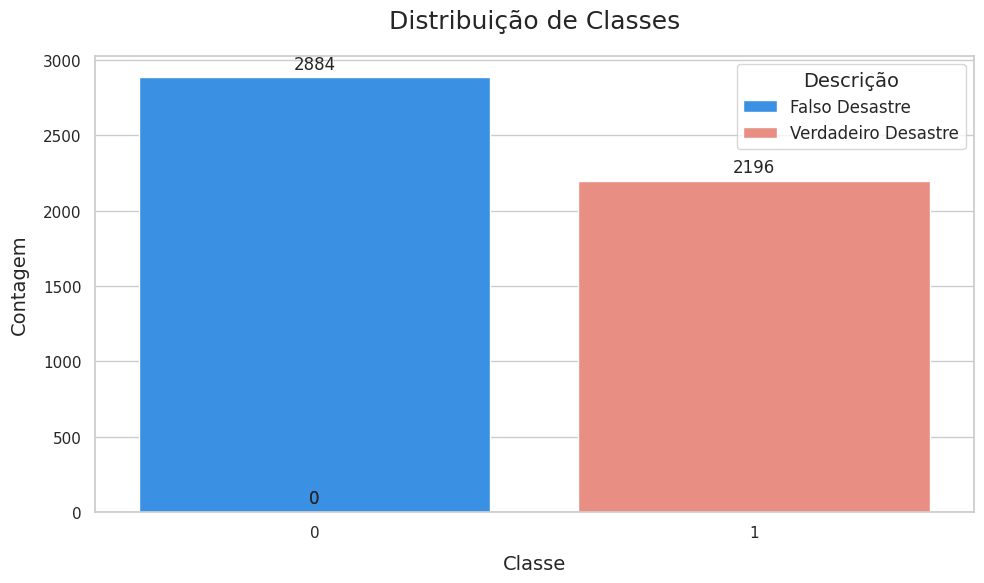

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo do gráfico
sns.set(style="whitegrid")

# Mapear os valores da coluna 'target'
target_mapping = {0: 'Falso Desastre', 1: 'Verdadeiro Desastre'}

# Criar o gráfico de contagem
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target', data=df_train, hue='target', palette={0: '#1E90FF', 1: '#FA8072'}, dodge=False)

# Adicionar anotações com as contagens em cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Título e rótulos aos eixos
plt.title('Distribuição de Classes', fontsize=18, pad=20)
plt.xlabel('Classe', fontsize=14, labelpad=10)
plt.ylabel('Contagem', fontsize=14, labelpad=10)

# Personalizar a legenda
plt.legend(title='Descrição', labels=target_mapping.values(), loc='upper right', fontsize=12, title_fontsize=14)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

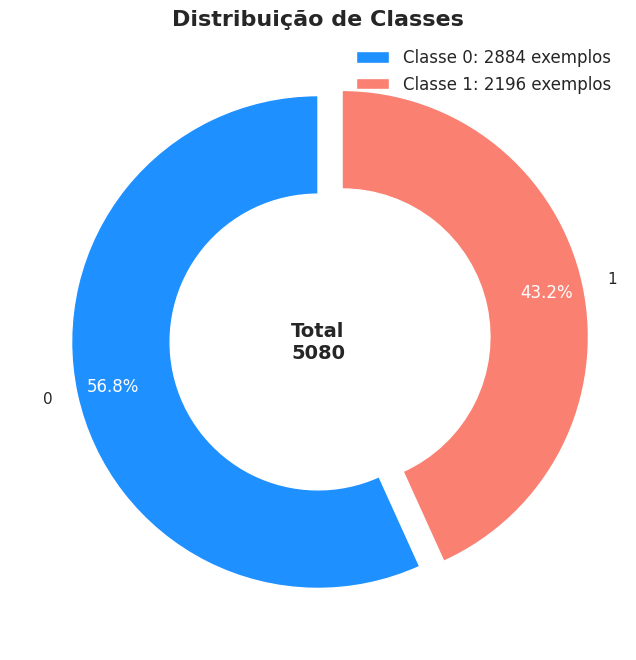

In [84]:
import matplotlib.pyplot as plt

# Contagem de classes
class_counts = df_train['target'].value_counts()

# Paleta de cores
colors = ["#1E90FF", "#FA8072"]  # Tons de azul e laranja

# Explodir a fatia da classe 1 para destacá-la
explode = (0, 0.1)

# Criar o gráfico de rosca
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    pctdistance=0.85,
    wedgeprops=dict(width=0.4)  # Define o tamanho do "anel"
)

# Ajustar a cor e tamanho do texto das porcentagens
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

# Centralizar o total no meio da rosca
total = class_counts.sum()
plt.text(0, 0, f'Total\n{total}', ha='center', va='center', fontsize=14, weight='bold')

# Adicionar título
plt.title('Distribuição de Classes', fontsize=16, weight='bold')

# Adicionar legenda
plt.legend(
    labels=[f'Classe {i}: {v} exemplos' for i, v in zip(class_counts.index, class_counts)],
    loc='upper right',
    fontsize=12,
    frameon=False
)

# Exibir o gráfico
plt.show()


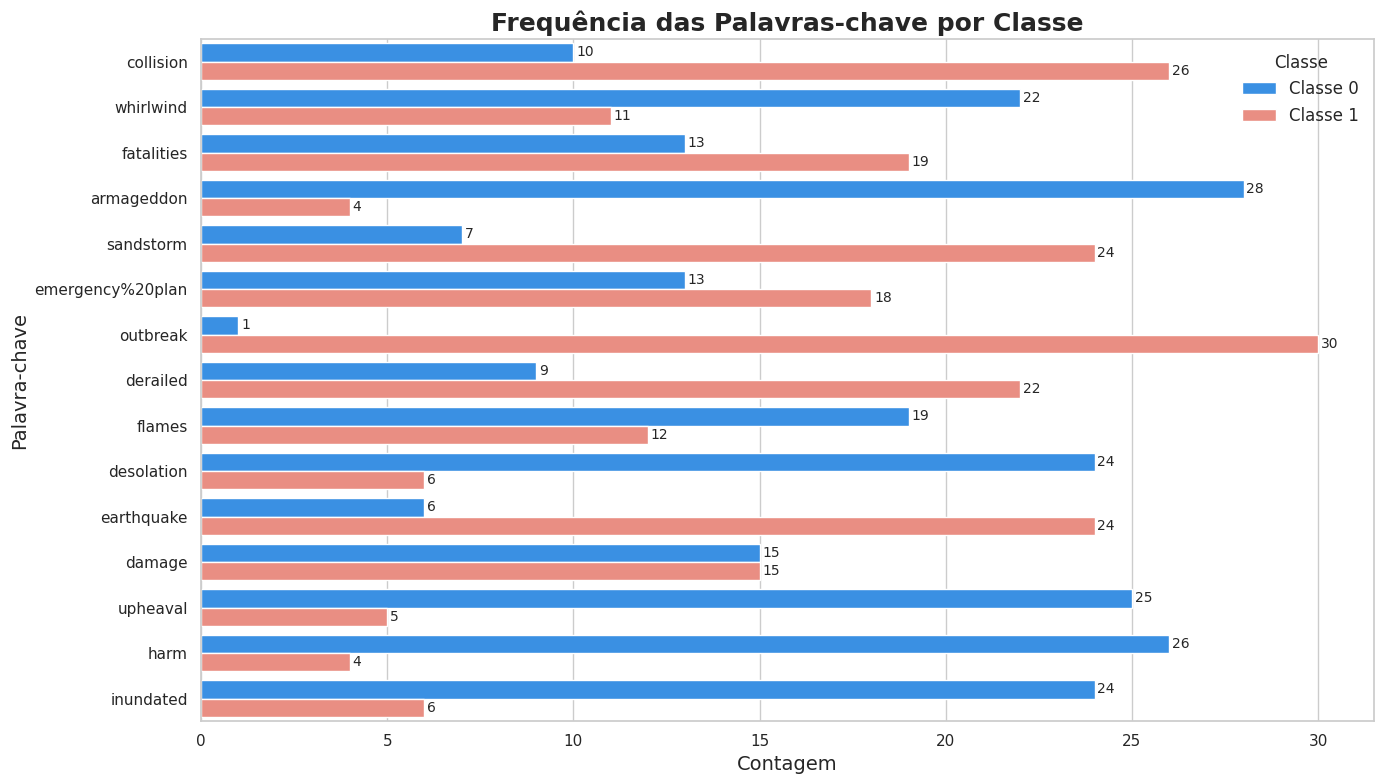

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo do gráfico
sns.set(style="whitegrid")

# Selecionar as 15 palavras-chave mais frequentes
top_keywords = df_train['keyword'].value_counts().index[:15]
df_top_keywords = df_train[df_train['keyword'].isin(top_keywords)]

# Criar o gráfico de barras horizontais empilhadas
plt.figure(figsize=(14, 8))
ax = sns.countplot(
    y='keyword',
    data=df_top_keywords,
    order=top_keywords,
    hue='target',
    palette=["#1E90FF", "#FA8072"]
)

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Título e rótulos dos eixos
plt.title('Frequência das Palavras-chave por Classe', fontsize=18, weight='bold')
plt.xlabel('Contagem', fontsize=14)
plt.ylabel('Palavra-chave', fontsize=14)

# Ajustar a legenda
plt.legend(
    title='Classe',
    loc='upper right',
    labels=['Classe 0', 'Classe 1'],  # Certifique-se de usar os valores do seu mapeamento de classe
    fontsize=12,
    frameon=False
)

# Ajustar o espaçamento
plt.tight_layout()

# Exibir o gráfico
plt.show()


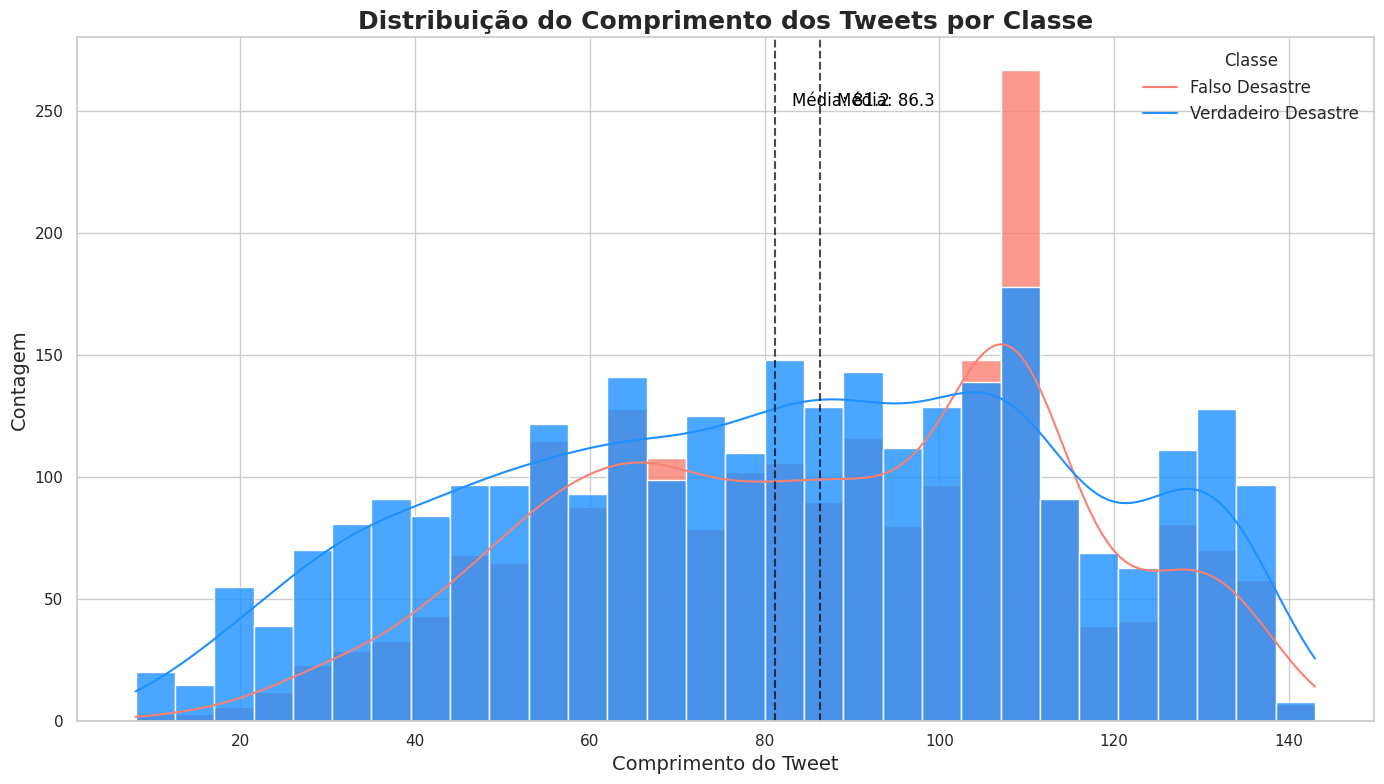

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Estilo do gráfico
sns.set(style="whitegrid")

# Calcular o comprimento dos tweets
df_train['tweet_length'] = df_train['text'].apply(len)

# Calcular médias por classe
mean_lengths = df_train.groupby('target')['tweet_length'].mean()

# Criar o histograma do comprimento dos tweets por classe
plt.figure(figsize=(14, 8))
ax = sns.histplot(
    data=df_train,
    x='tweet_length',
    hue='target',
    kde=True,
    bins=30,
    palette=["#1E90FF", "#FA8072"],

    alpha=0.8
)

# Adicionar linhas verticais para as médias
for target, mean_length in mean_lengths.items():
    plt.axvline(mean_length, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    plt.text(mean_length + 2, plt.ylim()[1] * 0.9, f'Média: {mean_length:.1f}', color='black', fontsize=12)

# Título e rótulos dos eixos
plt.title('Distribuição do Comprimento dos Tweets por Classe', fontsize=18, weight='bold')
plt.xlabel('Comprimento do Tweet', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Ajustar a legenda
plt.legend(
    title='Classe',
    labels=['Falso Desastre', 'Verdadeiro Desastre'],
    loc='upper right',
    fontsize=12,
    frameon=False
)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


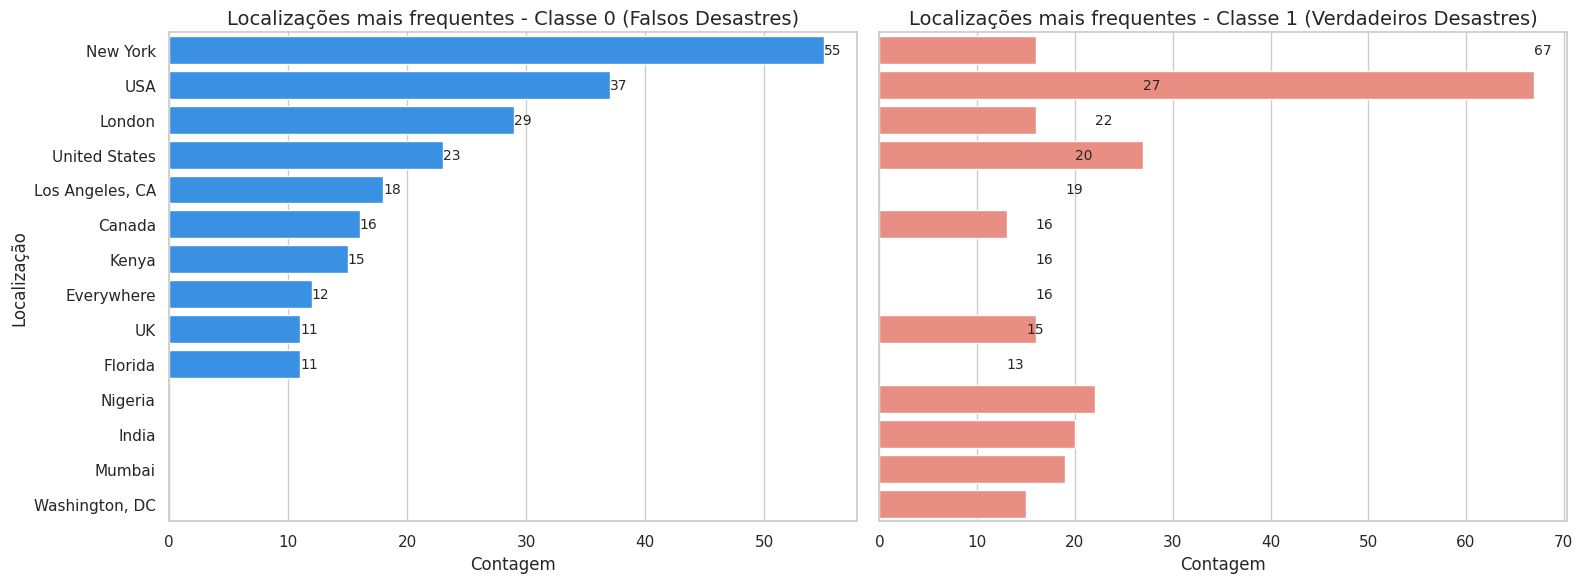

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo do gráfico
sns.set(style="whitegrid")

# Contagem de localizações para cada classe
locations_target_0 = df_train[df_train['target'] == 0]['location'].value_counts().head(10)
locations_target_1 = df_train[df_train['target'] == 1]['location'].value_counts().head(10)

# Criar subgráficos para as duas classes
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico para a classe 0
sns.barplot(
    x=locations_target_0.values,
    y=locations_target_0.index,
    color="#1E90FF" ,
    ax=axes[0]
)
axes[0].set_title('Localizações mais frequentes - Classe 0 (Falsos Desastres)', fontsize=14)
axes[0].set_xlabel('Contagem', fontsize=12)
axes[0].set_ylabel('Localização', fontsize=12)
for i, value in enumerate(locations_target_0.values):
    axes[0].text(value, i, f'{value}', va='center', fontsize=10)

# Gráfico para a classe 1
sns.barplot(
    x=locations_target_1.values,
    y=locations_target_1.index,
    color="#FA8072",
    ax=axes[1]
)
axes[1].set_title('Localizações mais frequentes - Classe 1 (Verdadeiros Desastres)', fontsize=14)
axes[1].set_xlabel('Contagem', fontsize=12)
axes[1].set_ylabel('', fontsize=12)  # Ocultar o rótulo duplicado do eixo Y
for i, value in enumerate(locations_target_1.values):
    axes[1].text(value, i, f'{value}', va='center', fontsize=10)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Modelagem

Melhores parâmetros: {'tfidf__ngram_range': (1, 1), 'tfidf__max_features': 5000, 'clf__max_iter': 1000, 'clf__loss': 'squared_hinge', 'clf__C': 0.1}

Relatório de Classificação:

                     precision    recall  f1-score   support

     Falso Desastre       0.77      0.88      0.82       577
Verdadeiro Desastre       0.81      0.65      0.72       439

           accuracy                           0.78      1016
          macro avg       0.79      0.76      0.77      1016
       weighted avg       0.78      0.78      0.78      1016



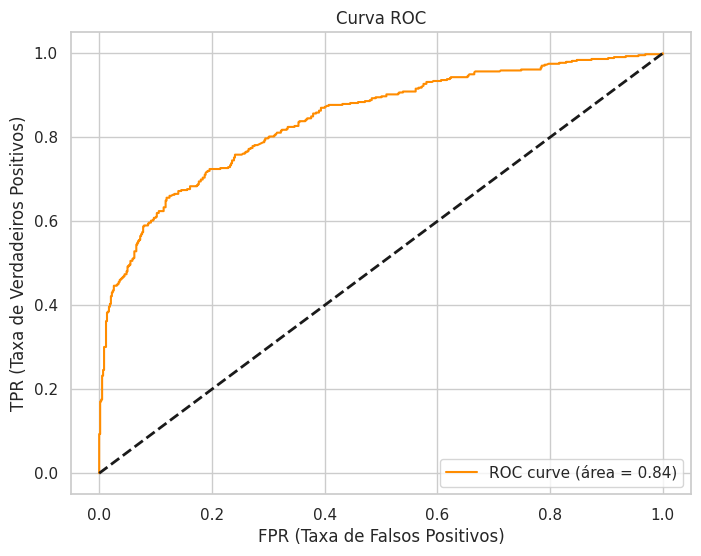

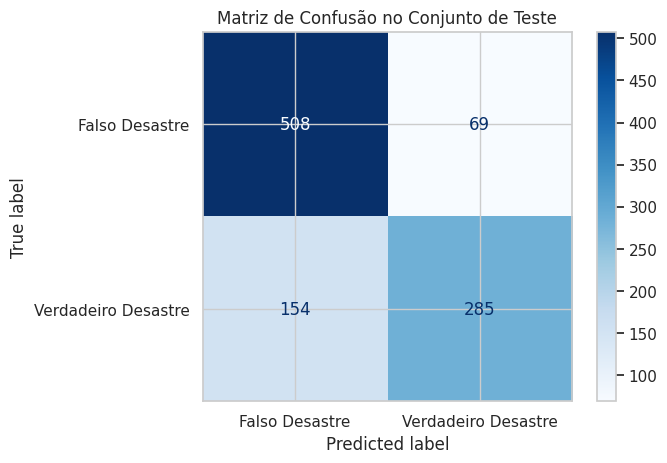

Resultado do teste manual: 1


In [87]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Definir X e y
X = df_train['text']
y = df_train['target']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=5, stop_words='english')),
    ('clf', LinearSVC(random_state=42))
])

# Definir espaço de hiperparâmetros para busca aleatória
param_dist = {
    'tfidf__max_features': [5000, 10000, 15000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10, 100],
    'clf__loss': ['squared_hinge', 'hinge'],
    'clf__max_iter': [1000, 2000]
}

# Buscar melhores hiperparâmetros
random_search = RandomizedSearchCV(
    pipeline, param_dist, cv=5, scoring='f1', n_iter=20, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Resultados da busca
print("Melhores parâmetros:", random_search.best_params_)

# Treinar o modelo com os melhores parâmetros
best_pipeline = random_search.best_estimator_
best_pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = best_pipeline.predict(X_test)

# Avaliar o desempenho do modelo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=["Falso Desastre", "Verdadeiro Desastre"]))

# Curva ROC
y_prob = best_pipeline.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (área = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Taxa de Verdadeiros Positivos)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Falso Desastre", "Verdadeiro Desastre"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão no Conjunto de Teste')
plt.show()

# Previsões no conjunto de teste
X_test_data = df_test['text']
y_pred_test = best_pipeline.predict(X_test_data)
df_predictions = pd.DataFrame({'id': df_test['id'], 'prediction': y_pred_test})

# Exemplo de teste manual
x_test_manual = 'airplane%20accident,France,Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn'
x_test_manual_transformed = best_pipeline.named_steps['tfidf'].transform([x_test_manual])
y_pred_test_manual = best_pipeline.named_steps['clf'].predict(x_test_manual_transformed)
print(f"Resultado do teste manual: {y_pred_test_manual[0]}")


## Testando outros modelos:

### Logistic Regression

Melhores parâmetros: {'tfidf__ngram_range': (1, 2), 'tfidf__max_features': 5000, 'lr__penalty': 'l2', 'lr__C': 1}

Relatório de Classificação:

                     precision    recall  f1-score   support

     Falso Desastre       0.77      0.87      0.82       577
Verdadeiro Desastre       0.79      0.66      0.72       439

           accuracy                           0.78      1016
          macro avg       0.78      0.76      0.77      1016
       weighted avg       0.78      0.78      0.77      1016



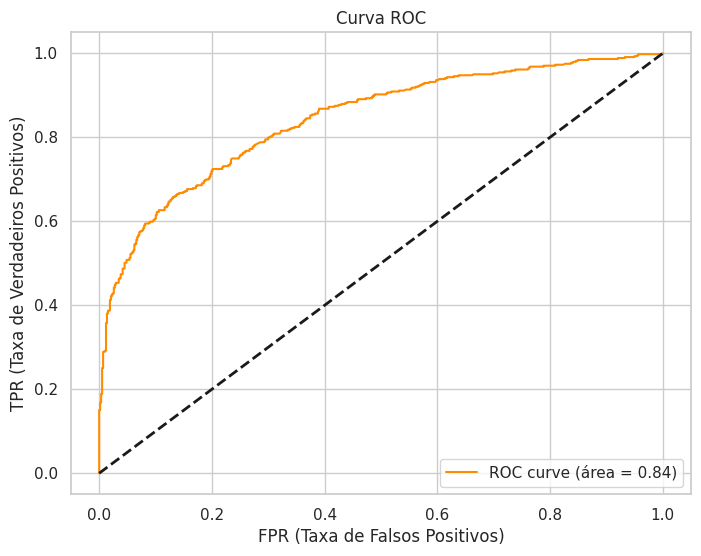

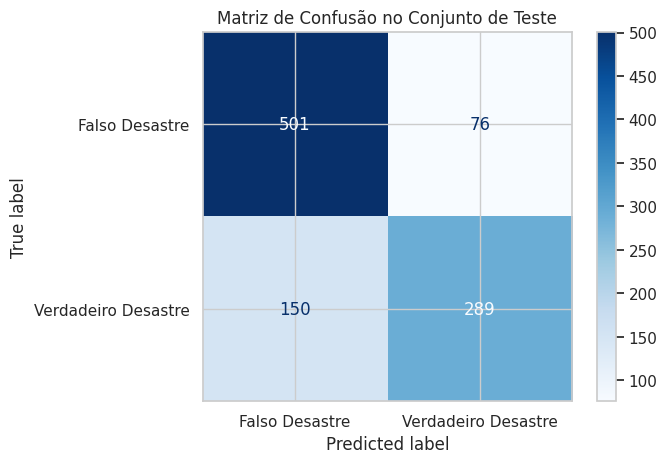

Resultado do teste manual: 1


In [91]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Definir X e y
X = df_train['text']
y = df_train['target']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=5, stop_words='english')),
    ('lr', LogisticRegression(random_state=42, solver='saga', max_iter=1000))
])

# Definir espaço de hiperparâmetros para busca aleatória
param_dist = {
    'tfidf__max_features': [5000, 10000, 15000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'lr__C': [0.1, 1, 10, 100],  # Regularização
    'lr__penalty': ['l1', 'l2'],  # Tipos de penalização
}

# Buscar melhores hiperparâmetros
random_search = RandomizedSearchCV(
    pipeline, param_dist, cv=5, scoring='f1', n_iter=20, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Resultados da busca
print("Melhores parâmetros:", random_search.best_params_)

# Treinar o modelo com os melhores parâmetros
best_pipeline = random_search.best_estimator_
best_pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = best_pipeline.predict(X_test)

# Avaliar o desempenho do modelo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=["Falso Desastre", "Verdadeiro Desastre"]))

# Fazer previsões de probabilidade no conjunto de teste
y_prob = best_pipeline.predict_proba(X_test)[:, 1]  # Use o pipeline completo

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (área = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Taxa de Verdadeiros Positivos)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Falso Desastre", "Verdadeiro Desastre"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão no Conjunto de Teste')
plt.show()

# Previsões no conjunto de teste
X_test_data = df_test['text']
y_pred_test = best_pipeline.predict(X_test_data)
df_predictions = pd.DataFrame({'id': df_test['id'], 'prediction': y_pred_test})

# Exemplo de teste manual
x_test_manual = 'airplane%20accident,France,Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn'
x_test_manual_transformed = best_pipeline.named_steps['tfidf'].transform([x_test_manual])
y_pred_test_manual = best_pipeline.named_steps['lr'].predict(x_test_manual_transformed)
print(f"Resultado do teste manual: {y_pred_test_manual[0]}")


### NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_report = classification_report(y_test, nb_pred)
print("Naive Bayes:")
print(nb_report)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros: {'tfidf__ngram_range': (1, 1), 'tfidf__max_features': 5000, 'nb__alpha': 0.1}

Relatório de Classificação:

                     precision    recall  f1-score   support

     Falso Desastre       0.77      0.86      0.81       577
Verdadeiro Desastre       0.78      0.66      0.71       439

           accuracy                           0.77      1016
          macro avg       0.77      0.76      0.76      1016
       weighted avg       0.77      0.77      0.77      1016



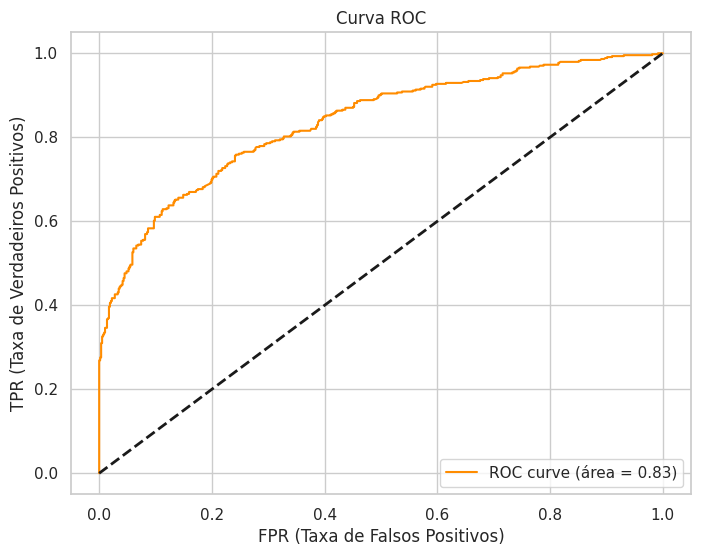

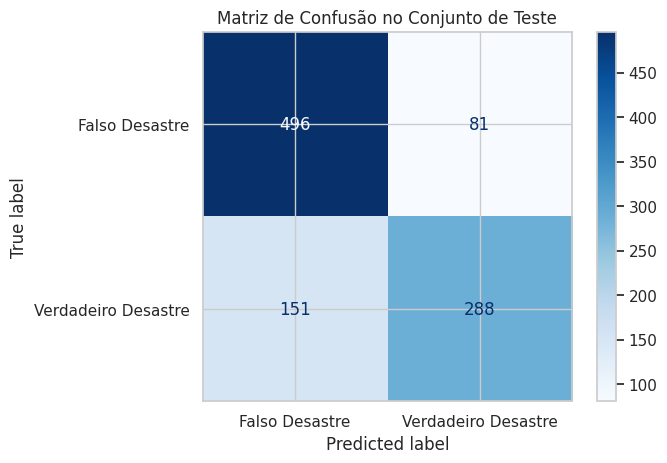

Resultado do teste manual: 1


In [94]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Definir X e y
X = df_train['text']
y = df_train['target']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=5, stop_words='english')),
    ('nb', MultinomialNB())
])

# Definir espaço de hiperparâmetros para busca aleatória
param_dist = {
    'tfidf__max_features': [5000, 10000, 15000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.1, 1, 10],  # Parâmetro de suavização (Laplace)
}

# Buscar melhores hiperparâmetros
random_search = RandomizedSearchCV(
    pipeline, param_dist, cv=5, scoring='f1', n_iter=20, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Resultados da busca
print("Melhores parâmetros:", random_search.best_params_)

# Treinar o modelo com os melhores parâmetros
best_pipeline = random_search.best_estimator_
best_pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = best_pipeline.predict(X_test)

# Avaliar o desempenho do modelo
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=["Falso Desastre", "Verdadeiro Desastre"]))

# Fazer previsões de probabilidade no conjunto de teste
y_prob = best_pipeline.predict_proba(X_test)[:, 1]  # Use o pipeline completo

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (área = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Taxa de Verdadeiros Positivos)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Falso Desastre", "Verdadeiro Desastre"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão no Conjunto de Teste')
plt.show()

# Previsões no conjunto de teste
X_test_data = df_test['text']
y_pred_test = best_pipeline.predict(X_test_data)
df_predictions = pd.DataFrame({'id': df_test['id'], 'prediction': y_pred_test})

# Exemplo de teste manual
x_test_manual = 'airplane%20accident,France,Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn'
x_test_manual_transformed = best_pipeline.named_steps['tfidf'].transform([x_test_manual])
y_pred_test_manual = best_pipeline.named_steps['nb'].predict(x_test_manual_transformed)
print(f"Resultado do teste manual: {y_pred_test_manual[0]}")
